<a href="https://colab.research.google.com/github/ParthikB/Neural-Style-Transfer/blob/v0.0/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import keras.backend as K
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.optimizers import Adam

import matplotlib.pyplot as plt
# import cv2
import numpy as np

Using TensorFlow backend.


# Helper Functions

## 1) Creating Cost Functions

#### 1.1) Defining the dependencies

In [0]:
# Defining the feature layers required
def getLayers():

  # Importing VGG19 Model
  model = VGG19(weights='imagenet', include_top=False)

  # Creating a Layer Dictionary --> layerName : layerOutput
  layers = dict([(layer.name, layer.output) for layer in model.layers])

  # Extracting the required activation output/features of Intermediate Layer of the Network
  contentLayer = layers['block4_conv2']

  styleLayer   = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
  styleLayer   = [layers[layer] for layer in styleLayer]

  return (contentLayer, styleLayer)

#### 1.2 Defining Cost Functions

In [0]:
# Content Cost Function
def computeContentCost(contentActivation, generatedActivation):
  return 0.5 * K.sum((contentActivation - generatedActivation)**2)

# Gram Matrix
def gramMatrix(x):
  return x * K.transpose(x)

# Style Cost
def computeStyleCost(styleActivation, generatedActivation):
  styleActivation     = gramMatrix(styleActivation)
  generatedActivation = gramMatrix(generatedActivation)
  return K.sum((styleActivation - generatedActivation)**2 / (2*224*224*3)**2)

# Total Cost
def totalCost(layers, ALPHA=10, BETA=40):
  
  # Extracting out the layers
  contentLayer, styleLayer = layers
  
  # Computing Content Cost
  contentActivation = contentLayer[0, :, :, :]
  generateActivation = contentLayer[1, :, :, :]

  print(contentActivation)
  print(generateActivation)


  contentCost = computeContentCost(contentActivation, generateActivation) 

  # Computing Style Cost
  styleCost = 0

  for sLayer in styleLayer: # Iterating over every layer and computing the features
    styleActivation    = sLayer[1, :, :, :]
    generateActivation = sLayer[2, :, :, :]

    styleCost += computeStyleCost(styleActivation, generateActivation)

  # Returning Total Cost with weights
  return ALPHA*contentCost + BETA*styleCost

## 2) Defining Images

In [0]:
def generateNoiseImage(contentImage, NOISE_RATIO = 0.97):
  img = np.random.uniform(-20, 20, (224, 224, 3)).astype('float32')
  noiseImg = (img * NOISE_RATIO) + (contentImage * (1-NOISE_RATIO))
  return noiseImg

In [0]:
def inputImageAndPreProcess(path):
  img = image.load_img(path, target_size=(224, 224, 3))
  img_arr = image.img_to_array(img)
  img_arr = np.expand_dims(img_arr, axis=0)
  img_arr = preprocess_input(img_arr)

  return img, img_arr

# Training

### Importing required Images

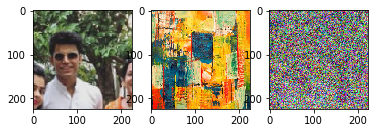

In [8]:
# Content Image
contentImage_path = "/content/drive/My Drive/Colab Notebooks/Neural Style Transfer/images/content1.jpg"
content, contentImage      = inputImageAndPreProcess(contentImage_path)

# Style Image
styleImage_path = "/content/drive/My Drive/Colab Notebooks/Neural Style Transfer/images/style1.jpg"
style, styleImage      = inputImageAndPreProcess(styleImage_path)

# Generate Image
generateImage = generateNoiseImage(image.img_to_array(content))
generateImage = image.array_to_img(generateImage)

f, axarr = plt.subplots(1,3)
axarr[0].imshow(content)
axarr[1].imshow(style)
axarr[2].imshow(generateImage)

### 

In [9]:
ITERATIONS = 1

layers = getLayers()

# baseModel = VGG19(weights='imagenet')

for epoch in range(ITERATIONS):

  # find content and generate activation using model.predict(img), where model final layer is the block4_conv2
  # model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

  # layers = getLayers()

  J = totalCost(layers)
  # find contentCost

  # iterate over every activation o/p for the style and generate image, and calculate styleCost

  # find the total Cost --> minimize





80142336/80134624 [==============================] - 4s 0us/step






Tensor("strided_slice:0", shape=(?, ?, 512), dtype=float32)
Tensor("strided_slice_1:0", shape=(?, ?, 512), dtype=float32)


In [10]:
J

<tf.Tensor 'add_5:0' shape=() dtype=float32>